In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot
import random
from fs import open_fs
from pathlib import Path
import shutil # Necesario para la operación de movimiento de archivos
import sys
from pathlib import Path

# This code snippet is used to import a custom Python module named 'pandas_missing_extension.py'
# located in the parent directory of the current notebook.
# 1. Get the path of the current notebook (where live-exploration-missing-values.ipynb is)
#    This will give you something like:
#    /home/paco/datos_faltantes/curso-datos-faltantes-main/jupyter/live-exploration-missing-values.ipynb
current_notebook_path = Path.cwd() # Path.cwd() returns the current working directory of the kernel

# 2. Navigate up one level to find the directory containing 'pandas_missing_extension.py'
#    This will give you:
#    /home/paco/datos_faltantes/curso-datos-faltantes-main/
project_root_dir = current_notebook_path.parent

# 3. Add this directory to Python's system path if it's not already there
#    This allows Python to find modules in this directory.
if str(project_root_dir) not in sys.path:
    sys.path.append(str(project_root_dir))
    print(f"Added {project_root_dir} to sys.path")

# 4. Now, import your custom accessor module
#    Python will now find 'pandas_missing_extension.py' in the added path.
import pandas_missing_extension
import warnings

# Puedes ser más específico con el tipo de advertencia si lo conoces, por ejemplo:
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)

# Para las advertencias relacionadas con pkg_resources (como las de tu captura):
warnings.filterwarnings("ignore", message="pkg_resources is deprecated as an API")
warnings.filterwarnings("ignore", message="Deprecated call to pkg_resources.declare_namespace")

Added /home/fcisnerosr/datos_faltantes/curso-datos-faltantes-main to sys.path


/home/fcisnerosr/miniforge3/envs/datos_faltantes/lib/python3.9/site-packages/fs/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
/home/fcisnerosr/miniforge3/envs/datos_faltantes/lib/python3.9/site-packages/pkg_resources/__init__.py:3146: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('mpl_toolkits')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/home/fcisnerosr/miniforge3/envs/datos_faltantes/lib/python3.9/site-packages/fs/__init__.py:4: DeprecationWarning: Deprecated call to `pkg_resources.decla

_Importación de librería de datos faltantes_

In [2]:
# Obtener la ruta del directorio del notebook como un objeto Path
notebook_path = Path.cwd() # O Path(__file__).parent si esto fuera un script .py
# En Jupyter, Path.cwd() suele apuntar al directorio del notebook.

# Obtener la ruta del directorio padre
parent_dir_pathlib = notebook_path.parent

# # Añadir el directorio padre al sys.path
# # sys.path necesita strings, así que convertimos el objeto Path a string
# if str(parent_dir_pathlib) not in sys.path:
#     print(sys.path.append(str(parent_dir_pathlib)))
#     print('hola')


# --- Ahora que el directorio padre está en sys.path, puedes importar tu archivo ---
# El nombre del archivo debe ser el nombre del módulo (sin la extensión .py)
try:
    import pandas_missing_extension # Nota: sin la extensión .py
    print("Módulo 'pandas_missing_entention.py' importado exitosamente.")

    # Si tu archivo tiene funciones, clases, etc., puedes acceder a ellas así:
    # from pandas_missing_entention import mi_funcion_util
    # resultado = mi_funcion_util(df)

except ImportError:
    print("Error: No se pudo importar el módulo 'pandas_missing_entention.py'.")
    print("Verifica que el nombre del archivo sea correcto y que la ruta al directorio padre se haya añadido correctamente.")
    print(f"sys.path actual: {sys.path}")

Módulo 'pandas_missing_entention.py' importado exitosamente.


In [3]:
# --- DataFrame para practicar graficación de datos faltantes ---

# Crear datos base
num_participantes = 100
generos = ['Hombre', 'Mujer', 'Otro']
ciudades = ['Ciudad A', 'Ciudad B', 'Ciudad C', 'Ciudad D']
niveles_educacion = ['Primaria', 'Secundaria', 'Universidad', 'Posgrado']

data = {
    'ID_Participante': range(1, num_participantes + 1),
    'Genero': random.choices(generos, weights=[0.45, 0.45, 0.10], k=num_participantes),
    'Ciudad': random.choices(ciudades, weights=[0.25, 0.30, 0.20, 0.25], k=num_participantes),
    'Nivel_Educacion': random.choices(niveles_educacion, weights=[0.1, 0.2, 0.4, 0.3], k=num_participantes),
    'Edad_Exacta': [random.randint(18, 70) for _ in range(num_participantes)],
    'Ingresos_Mensuales': [random.randint(20000, 150000) for _ in range(num_participantes)],
    'Opinion_Controversial': [random.choice(['A Favor', 'En Contra', 'Indeciso', np.nan]) for _ in range(num_participantes)],
    'Horas_Trabajadas_Semana': [random.randint(20, 60) for _ in range(num_participantes)],
    'Frecuencia_Ejercicio': [random.choice(['Diario', 'Semanal', 'Mensual', 'Nunca']) for _ in range(num_participantes)]
}

In [4]:
df_encuesta = pd.DataFrame(data)

In [5]:
# 2. Obtener la ruta del directorio de trabajo actual (Current Working Directory - CWD)
# Path.cwd() devuelve un objeto Path que representa el CWD.
directorio_actual = Path.cwd()

# 3. Definir el nombre del archivo CSV
nombre_archivo = "mi_dataframe_encuesta.csv"

# 4. Combinar la ruta del directorio actual con el nombre del archivo
# El operador / de pathlib es ideal para esto
ruta_completa_csv = directorio_actual / nombre_archivo

# 5. Guardar el DataFrame a CSV
# index=False es crucial para no guardar el índice del DataFrame como una columna en el CSV
df_encuesta.to_csv(ruta_completa_csv, index=False)

print(f"DataFrame guardado exitosamente en: {ruta_completa_csv}")

DataFrame guardado exitosamente en: /home/fcisnerosr/datos_faltantes/curso-datos-faltantes-main/mio/mi_dataframe_encuesta.csv


_Información de datos faltantes_

In [6]:
print('dimensiones df', df_encuesta.shape)
print('Datos completos del df:', df_encuesta.missing.number_complete())
print('Datos faltantes del df:', df_encuesta.missing.number_missing())
print('Resumen de variables faltantes: \n', df_encuesta.missing.missing_variable_summary())

dimensiones df (100, 9)
Datos completos del df: 873
Datos faltantes del df: 27
Resumen de variables faltantes: 
                   variable  n_missing  n_cases  pct_missing
0          ID_Participante          0      100          0.0
1                   Genero          0      100          0.0
2                   Ciudad          0      100          0.0
3          Nivel_Educacion          0      100          0.0
4              Edad_Exacta          0      100          0.0
5       Ingresos_Mensuales          0      100          0.0
6    Opinion_Controversial         27      100         27.0
7  Horas_Trabajadas_Semana          0      100          0.0
8     Frecuencia_Ejercicio          0      100          0.0


_Grafica de datos faltantes_

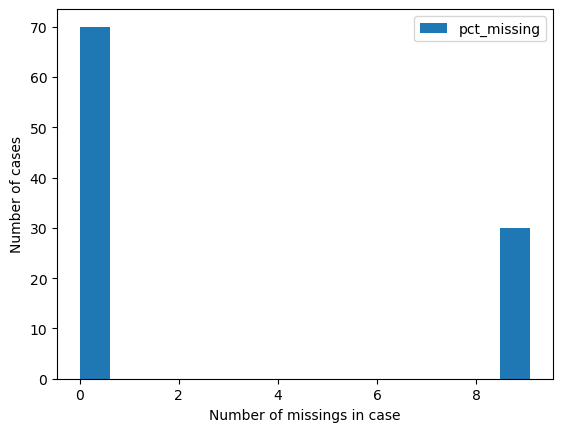

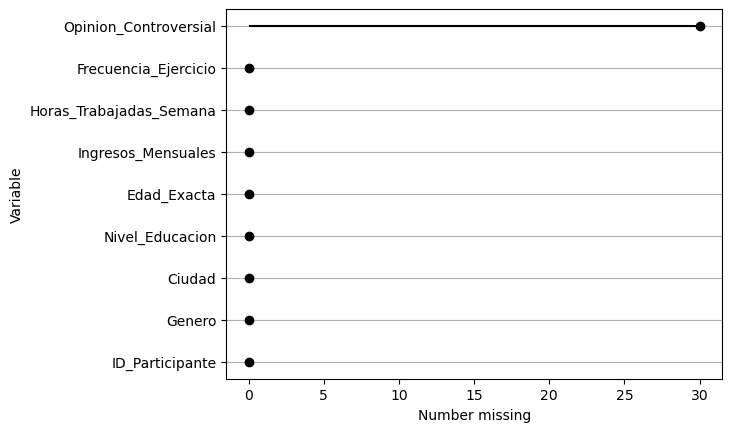

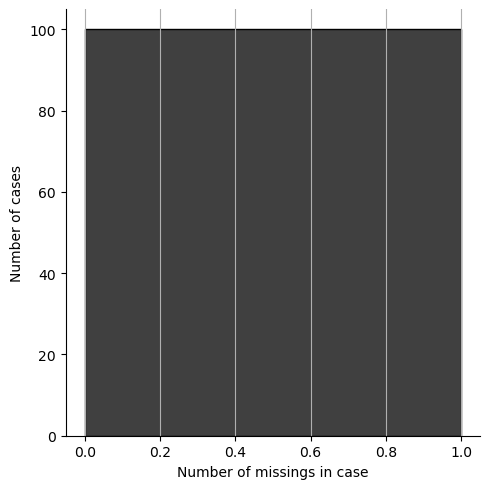

In [21]:
df_encuesta.missing.missing_case_plot()
df_encuesta.missing.missing_variable_plot()